<a href="https://colab.research.google.com/github/rmorlowski/Regression-Analysis-and-Multivariate-Methods/blob/master/Ames_Housing_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ames Housing Model

The deliverable is to analyze housing data from the Ames train dataset to predict the sale price (in dollars) of the Ames test dataset. This will be accomplished through exploratory data analysis and by generating regression models using different variable selection techniques including simple and multiple regression. From these techniques, the best model will be selected. The best model will then be further analyzed to determine if it is an adequate model to predict or if further analysis or data transformation is necessary.

To access Kaggle for this assignment use the link below:

*   [Kaggle Competition](https://www.kaggle.com/t/61f707318ddb46e1a3f681f8c7007938)



In [0]:
#import some packages you will be using
import pandas as pd
import pandas_profiling
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf  
import matplotlib.pyplot as plt 
from scipy import stats
from sklearn import linear_model, metrics
 
get_ipython().magic(u'matplotlib inline')
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [0]:
#set some options for the output
pd.set_option('display.notebook_repr_html', False) 
pd.set_option('display.max_columns', 40) 
pd.set_option('display.max_rows', 10) 
pd.set_option('display.width', 120)

In [0]:
# Import file to google colaboratory
from google.colab import files
uploaded = files.upload()

Saving AMES_TRAIN.csv to AMES_TRAIN.csv


In [0]:
import io
#read in the datasets
train = pd.read_csv('AMES_TRAIN.csv')

In [0]:
# Import file to google colaboratory
from google.colab import files
uploaded = files.upload()

Saving AMES_TEST_SFAM.csv to AMES_TEST_SFAM.csv


In [0]:
#read in the datasets
test = pd.read_csv('AMES_TEST_SFAM.csv')


In [0]:
#A good step to take is to convert all variable names to lower case
train.columns = [s.lower() for s in train.columns]
test.columns = [s.lower() for s in test.columns]

In [0]:
#do some exploration of the data
print('')
print('----- Summary of Train Data -----')
print('')
#pandas_profiling.ProfileReport(train)


----- Summary of Train Data -----



In [0]:
# show the object is a DataFrame
print('Object type: ', type(train))

Object type:  <class 'pandas.core.frame.DataFrame'>


In [0]:
# show number of observations in the DataFrame
print('Number of observations: ', len(train))

Number of observations:  2039


In [0]:
# show variable names
print('Variable names: ', train.columns)

Variable names:  Index(['subclass', 'zoning', 'lotfrontage', 'lotarea', 'street', 'alley', 'lotshape', 'landcontour', 'utilities',
       'lotconfig', 'landslope', 'neighborhood', 'condition1', 'condition2', 'bldgtype', 'housestyle', 'overallqual',
       'overallcond', 'yearbuilt', 'yearremodel', 'roofstyle', 'roofmat', 'exterior1', 'exterior2', 'masvnrtype',
       'masvnrarea', 'exterqual', 'extercond', 'foundation', 'bsmtqual', 'bsmtcond', 'bsmtexposure', 'bsmtfintype1',
       'bsmtfinsf1', 'bsmtfintype2', 'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', 'heating', 'heatingqc', 'centralair',
       'electrical', 'firstflrsf', 'secondflrsf', 'lowqualfinsf', 'grlivarea', 'bsmtfullbath', 'bsmthalfbath',
       'fullbath', 'halfbath', 'bedroomabvgr', 'kitchenabvgr', 'kitchenqual', 'totrmsabvgrd', 'functional',
       'fireplaces', 'fireplacequ', 'garagetype', 'garageyrblt', 'garagefinish', 'garagecars', 'garagearea',
       'garagequal', 'garagecond', 'paveddrive', 'wooddecksf', 'openporchsf

In [0]:
#Do we have missing values? 
datasetHasNan = False
if train.count().min() == train.shape[0] and test.count().min() == test.shape[0] :
    print('We do not need to worry about missing values.') 
else:
    datasetHasNan = True
    print('oops we have nan')

oops we have nan


In [0]:
print('----train dataset column types information-------')
dtype_df = train.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df.groupby("Column Type").aggregate('count').reset_index()

----train dataset column types information-------


  Column Type  Count
0       int64     29
1     float64      9
2      object     43

In [0]:
#Check for missing data & list them 
if datasetHasNan == True:
    nas = pd.concat([train.isnull().sum(), test.isnull().sum()], axis=1, keys=['Train Dataset', 'Test Dataset']) 
    print('Nan in the data sets')
    print(nas[nas.sum(axis=1) > 0])

Nan in the data sets
              Train Dataset  Test Dataset
alley                1893.0           690
bsmtcond               54.0            12
bsmtexposure           56.0            13
bsmtfinsf1              1.0             0
bsmtfinsf2              1.0             0
...                     ...           ...
miscfeature          1963.0           698
p_saleprice             NaN           726
poolqc               2028.0           724
saleprice               0.0           726
totalbsmtsf             1.0             0

[29 rows x 2 columns]


In [0]:
# show a portion of the beginning of the DataFrame
print(train.head())

   subclass zoning  lotfrontage  lotarea street alley lotshape landcontour utilities lotconfig landslope neighborhood  \
0        20     RL          NaN    11838   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl      CollgCr   
1        60     RL         70.0     8304   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl      SawyerW   
2        45     RM         58.0     6380   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl      BrkSide   
3        60     RL          NaN    14803   Pave   NaN      IR1         Lvl    AllPub   CulDSac       Gtl       NWAmes   
4        20     RL         91.0    11375   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl       Sawyer   

  condition1 condition2 bldgtype housestyle  overallqual  overallcond  yearbuilt  yearremodel  ...  garagearea  \
0       Norm       Norm     1Fam     1Story            8            5       2001         2001  ...         522   
1       Norm       Norm     1Fam     2Story  

In [0]:
#watch your record count and fix records with missing NaN data
print (train.shape)
train.isnull().sum()
train[train == 0].count()

(2039, 81)


subclass         0
zoning           0
lotfrontage      0
lotarea          0
street           0
                ..
yrsold           0
saletype         0
salecondition    0
saleprice        0
index            0
Length: 81, dtype: int64

In [0]:
#Fill missing values with NA per data dictionary
train.loc[:, "alley"] = train.loc[:, "alley"].fillna("NA")
train.loc[:, "bsmtcond"] = train.loc[:, "bsmtcond"].fillna("NA")
train.loc[:, "bsmtexposure"] = train.loc[:, "bsmtexposure"].fillna("NA")
train.loc[:, "bsmtfintype1"] = train.loc[:, "bsmtfintype1"].fillna("NA")
train.loc[:, "bsmtfintype2"] = train.loc[:, "bsmtfintype2"].fillna("NA")
train.loc[:, "bsmtqual"] = train.loc[:, "bsmtqual"].fillna("NA")
train.loc[:, "fence"] = train.loc[:, "fence"].fillna("NA")
train.loc[:, "fireplacequ"] = train.loc[:, "fireplacequ"].fillna("NA")
train.loc[:, "garagecond"] = train.loc[:, "garagecond"].fillna("NA")
train.loc[:, "garagefinish"] = train.loc[:, "garagefinish"].fillna("NA")
train.loc[:, "garagequal"] = train.loc[:, "garagequal"].fillna("NA")
train.loc[:, "garagetype"] = train.loc[:, "garagetype"].fillna("NA")
train.loc[:, "miscfeature"] = train.loc[:, "miscfeature"].fillna("NA")
train.loc[:, "poolqc"] = train.loc[:, "poolqc"].fillna("NA")

#most common value
train.loc[:, "electrical"] = train.loc[:, "electrical"].fillna("SBrkr")
train.loc[:, "masvnrtype"] = train.loc[:, "masvnrtype"].fillna("None")

# handle missing values for features where median/mean or most common value doesn't make sense
train.loc[:, "bsmtfullbath"] = train.loc[:, "bsmtfullbath"].fillna(0)
train.loc[:, "bsmthalfbath"] = train.loc[:, "bsmthalfbath"].fillna(0)
train.loc[:, "bsmtunfsf"] = train.loc[:, "bsmtunfsf"].fillna(0)
train.loc[:, "bsmtfinsf1"] = train.loc[:, "bsmtfinsf1"].fillna(0)
train.loc[:, "bsmtfinsf2"] = train.loc[:, "bsmtfinsf2"].fillna(0)
train.loc[:, "masvnrarea"] = train.loc[:, "masvnrarea"].fillna(0)


In [0]:
#Replace NaN values with medians in train data
train=train.replace({'lotfrontage': {np.NaN : 50}})
train=train.replace({'garageyrblt': {np.NaN : 1972}})
train=train.replace({'totalbsmtsf': {np.NaN : 975}})

In [0]:
#Convert ordinal variables to numbers per data dictionary
train = train.replace({"bsmtcond" : {"NA" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "bsmtqual" : {"NA" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                       "bsmtexposure" : {"NA" : 0,"No" : 1, "Mn" : 2, "Av": 3, "Gd" : 4},
                       "bsmtfintype1" : {"NA" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4,
                                         "ALQ" : 5, "GLQ" : 6},
                       "bsmtfintype2" : {"NA" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4,
                                         "ALQ" : 5, "GLQ" : 6},
                       "electrical" : {"Mix" : 1, "FuseP" : 2, "FuseF": 3, "FusA": 4, "SBrkr" : 5},
                       "extercond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "exterqual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "fence" : {"NA" : 0, "MnWw" : 1, "GdWo": 2, "MnPrv": 3, "GdPrv" : 4},
                       "fireplacequ" : {"NA" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "functional" : {"Sal" : 1, "Sev" : 2, "Maj" : 3, "Mod": 4, "Min"  : 5, "Typ" : 6},
                       "garagefinish" : {"NA" : 0, "Unf" : 1, "RFn" : 2, "Fin" : 3},
                       "garagecond" : {"NA" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "garagequal" : {"NA" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "heatingqc" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "kitchenqual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "landslope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                       "lotshape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                       "paveddrive" : {"N" : 0, "P" : 1, "Y" : 2},
                       "poolqc" : {"NA" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
                       "utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4}}
                     )

In [0]:
#CHECK CLEAN DATA
#pandas_profiling.ProfileReport(train)

In [0]:
# show descriptive statistics
print(train.describe())

          subclass  lotfrontage        lotarea     lotshape    utilities    landslope  overallqual  overallcond  \
count  2039.000000  2039.000000    2039.000000  2039.000000  2039.000000  2039.000000  2039.000000  2039.000000   
mean     56.586562    65.619912   10062.990191     3.612555     3.998529     2.948014     6.077979     5.585091   
std      41.876919    22.206238    8125.002560     0.555956     0.049510     0.243149     1.407362     1.107337   
min      20.000000    21.000000    1477.000000     1.000000     2.000000     1.000000     1.000000     1.000000   
25%      20.000000    50.000000    7365.000000     3.000000     4.000000     3.000000     5.000000     5.000000   
50%      50.000000    62.000000    9320.000000     4.000000     4.000000     3.000000     6.000000     5.000000   
75%      70.000000    78.000000   11424.500000     4.000000     4.000000     3.000000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000     4.000000     4.000000     3.0

In [0]:
# show a portion of the beginning of the clean DataFrame
print(train.head())

   subclass zoning  lotfrontage  lotarea street alley  lotshape landcontour  utilities lotconfig  landslope  \
0        20     RL         50.0    11838   Pave    NA         4         Lvl          4    Inside          3   
1        60     RL         70.0     8304   Pave    NA         3         Lvl          4    Inside          3   
2        45     RM         58.0     6380   Pave    NA         4         Lvl          4    Inside          3   
3        60     RL         50.0    14803   Pave    NA         3         Lvl          4   CulDSac          3   
4        20     RL         91.0    11375   Pave    NA         4         Lvl          4    Inside          3   

  neighborhood condition1 condition2 bldgtype housestyle  overallqual  overallcond  yearbuilt  yearremodel  ...    \
0      CollgCr       Norm       Norm     1Fam     1Story            8            5       2001         2001  ...     
1      SawyerW       Norm       Norm     1Fam     2Story            6            5       1997      

In [0]:
print('')
print('----- EDA of Train Data: Continuous Variable Analysis -----')
print('')


----- EDA of Train Data: Continuous Variable Analysis -----



/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


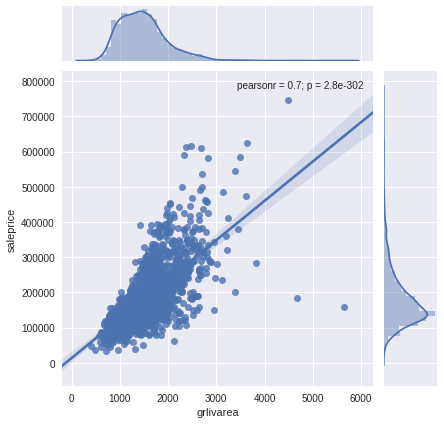

In [0]:
# Joint Distribution Plot of grlivarea
sns.jointplot(x='grlivarea', y='saleprice', data=train, kind="reg")

In [0]:
#Remove outliers 'any houses with more than 4000 square feet' from the dataset
train = train[train.grlivarea < 4000]

The average house has 1,480 sq ft of space, the median 1,430 sq ft
The biggest house has 3,820 sq ft of space, the smallest 407 sq ft


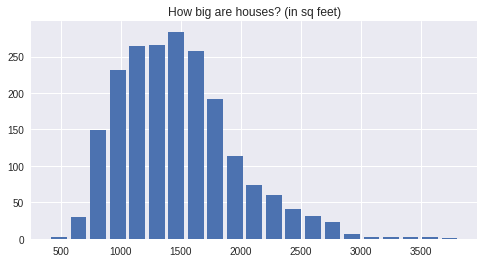

In [0]:
# How big are houses? (After removing outliers <4000)
print('The average house has {:,.0f} sq ft of space, the median {:,.0f} sq ft'.format(
    train.grlivarea.mean(), train.grlivarea.median()))
print('The biggest house has {:,.0f} sq ft of space, the smallest {:,.0f} sq ft'.format(
    train.grlivarea.max(), train.grlivarea.min()))
train.grlivarea.hist(bins=21, rwidth=.8, figsize=(8,4))
plt.title('How big are houses? (in sq feet)')
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


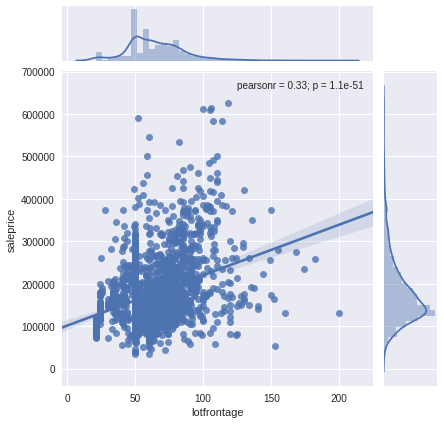

In [0]:
# Joint Distribution Plot of lotfrontage
sns.jointplot(x='lotfrontage', y='saleprice', data=train, kind="reg")

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


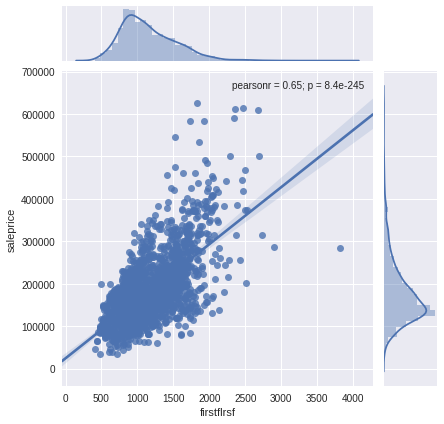

In [0]:
# Joint Distribution Plot of firstflrsf
sns.jointplot(x='firstflrsf', y='saleprice', data=train, kind="reg")

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


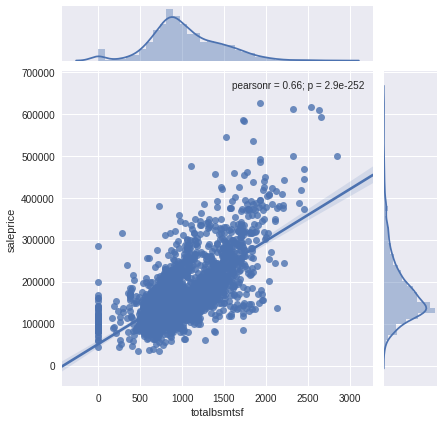

In [0]:
# Joint Distribution Plot of totalbsmtsf
sns.jointplot(x='totalbsmtsf', y='saleprice', data=train, kind="reg")

The cheapest house sold for $34,900 and the most expensive for $625,000
The average sales price is $179,098, while median is $160,000


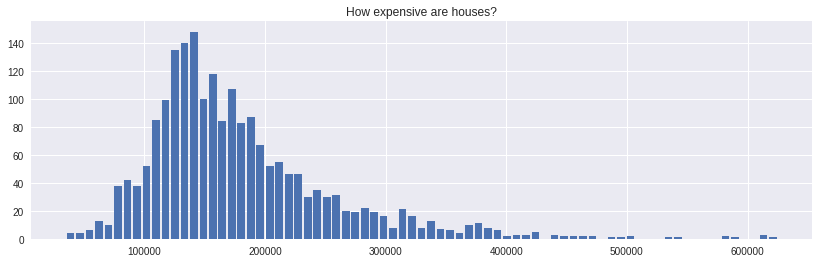

In [0]:
# How expensive are houses?
print('The cheapest house sold for ${:,.0f} and the most expensive for ${:,.0f}'.format(
    train.saleprice.min(), train.saleprice.max()))
print('The average sales price is ${:,.0f}, while median is ${:,.0f}'.format(
    train.saleprice.mean(), train.saleprice.median()))
train.saleprice.hist(bins=75, rwidth=.8, figsize=(14,4))
plt.title('How expensive are houses?')
plt.show()

In [0]:
print('Skew: {:.3f} | Kurtosis: {:.3f}'.format(
    train.saleprice.skew(), train.saleprice.kurtosis()))

Skew: 1.658 | Kurtosis: 4.249


In [0]:
print('')
print('----- EDA of Train Data: Discrete Variable Analysis -----')
print('')


----- EDA of Train Data: Discrete Variable Analysis -----



/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


Text(0.5, 1.0, 'Sale Price vs Garage Cars')

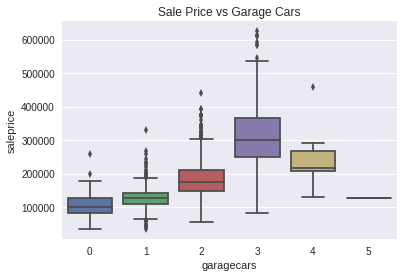

In [0]:
#EDA Discrete Variable Analysis (Categorical)
#Boxplots of the response variable saleprice vs predictor variables
sns.boxplot(x="garagecars", y="saleprice", data=train).set_title('Sale Price vs Garage Cars')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


Text(0.5, 1.0, 'Sale Price vs Exterior Quality')

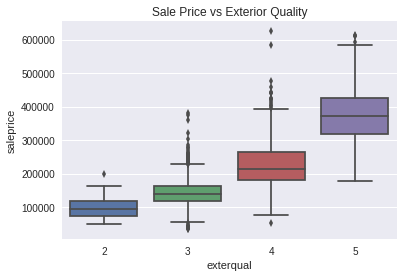

In [0]:
sns.boxplot(x="exterqual", y="saleprice", data=train).set_title('Sale Price vs Exterior Quality')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


Text(0.5, 1.0, 'Sale Price vs Kitchen Quality')

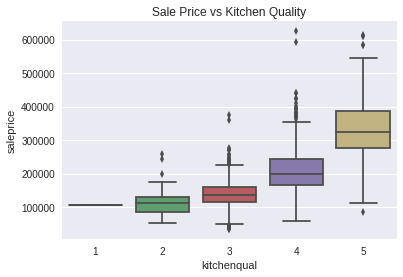

In [0]:
sns.boxplot(x="kitchenqual", y="saleprice", data=train).set_title('Sale Price vs Kitchen Quality')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


Text(0.5, 1.0, 'Sale Price vs Building Type')

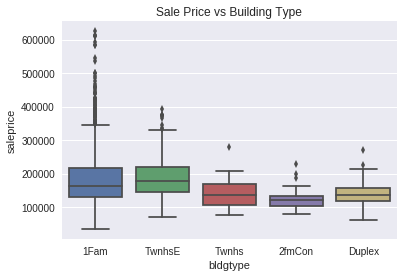

In [0]:
sns.boxplot(x="bldgtype", y="saleprice", data=train).set_title('Sale Price vs Building Type')

Oldest house built in 1872. Newest house built in 2010.


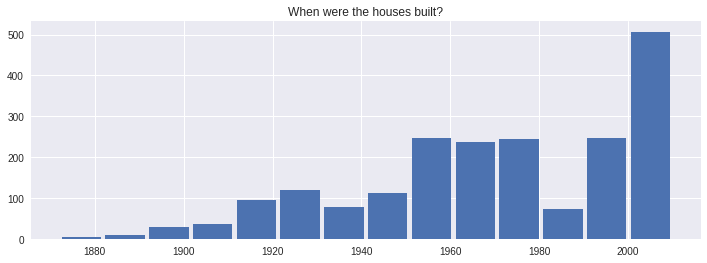

In [0]:
# When were the houses built?
print('Oldest house built in {}. Newest house built in {}.'.format(
    train.yearbuilt.min(), train.yearbuilt.max()))
train.yearbuilt.hist(bins=14, rwidth=.9, figsize=(12,4))
plt.title('When were the houses built?')
plt.show()

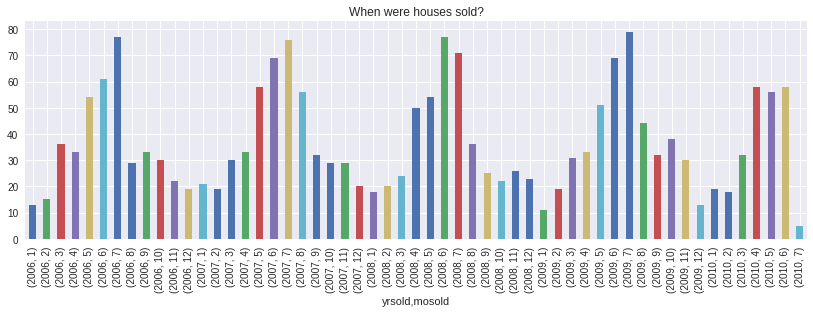

In [0]:
train.groupby(['yrsold','mosold']).index.count().plot(kind='bar', figsize=(14,4))
plt.title('When were houses sold?')
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Text(0.5, 1.0, 'What month were houses sold?')

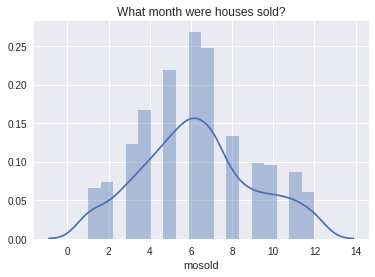

In [0]:
#Distribution Plot (Histogram of saleprice vs mosold)
#Histogram confirms seasonality in saleprice vs mosold
sns.distplot(train.mosold).set_title('What month were houses sold?')

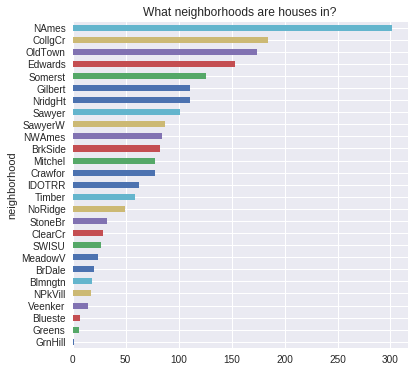

In [0]:
# Where are houses?
train.groupby('neighborhood').index.count().\
    sort_values().\
    plot(kind='barh', figsize=(6,6))
plt.title('What neighborhoods are houses in?')
plt.show()

In [0]:
print('')
print('----- Data Cleansing Before Regression -----')
print('')


----- Data Cleansing Before Regression -----



In [0]:
# *BONUS* ADD NEW VARIABLES FOR ANALYSIS

# Total number of bathrooms (train)
train["totalbath"] = train["bsmtfullbath"] + (0.5 * train["bsmthalfbath"]) + \
train["fullbath"] + (0.5 * train["halfbath"])
# Total number of bathrooms (test)
test["totalbath"] = test["bsmtfullbath"] + (0.5 * test["bsmthalfbath"]) + \
test["fullbath"] + (0.5 * test["halfbath"])
# Total SF for house (train)
train["totalsf"] = train["grlivarea"] + train["totalbsmtsf"]
# Total SF for house (test)
test["totalsf"] = test["grlivarea"] + test["totalbsmtsf"]

In [0]:
#Replace 0 values with medians in train data
train1 = train
m = np.median(train1.grlivarea[train1.grlivarea>0])
train1=train1.replace({'grlivarea': {0: m}})

In [0]:
# Find most important features relative to target
print("Find most important features relative to target")
corr = train.corr()
corr.sort_values(["saleprice"], ascending = False, inplace = True)
print(corr.saleprice)

Find most important features relative to target
saleprice        1.000000
totalsf          0.823339
overallqual      0.805048
grlivarea        0.716562
exterqual        0.699112
                   ...   
overallcond     -0.108835
kitchenabvgr    -0.110359
enclosedporch   -0.133619
fence           -0.166548
lotshape        -0.289179
Name: saleprice, Length: 60, dtype: float64


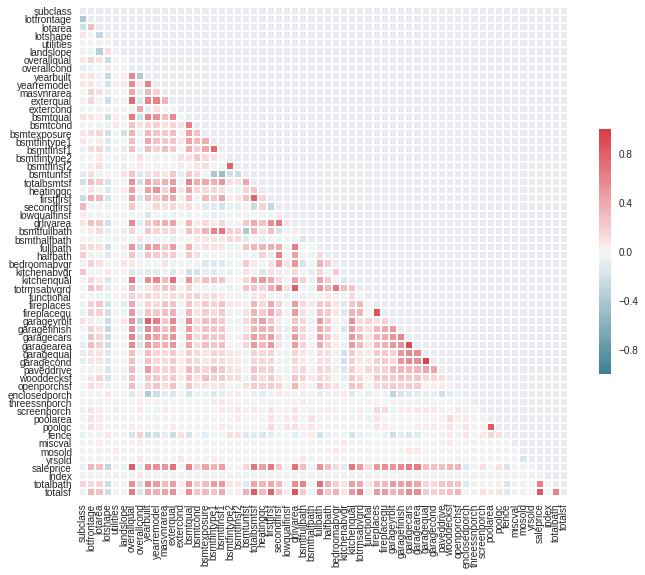

In [0]:
#Create a heatmap to check for correlated variables
# Compute the correlation matrix
corr = train.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
        square=True, linewidths=1, xticklabels = True, yticklabels = True, cbar_kws={"shrink": .5})

In [0]:
#Run a simple model#Find the best single variable model
#model = smf.ols(formula='saleprice ~ grlivarea' , data=train1).fit()  

#print (model.summary())

In [0]:
#Find the best single variable model
lm = smf.ols(formula='saleprice ~ overallqual' , data=train1).fit()  
  
print (lm.summary())
print (lm.params)

                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     3746.
Date:                Fri, 22 Feb 2019   Prob (F-statistic):               0.00
Time:                        18:47:22   Log-Likelihood:                -24761.
No. Observations:                2036   AIC:                         4.953e+04
Df Residuals:                    2034   BIC:                         4.954e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -9.333e+04   4567.820    -20.432      

In [0]:
#Second best single variable model
lm1 = smf.ols(formula='saleprice ~ totalsf' , data=train1).fit()  
  
print (lm1.summary())
print (lm1.params)

                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     4281.
Date:                Fri, 22 Feb 2019   Prob (F-statistic):               0.00
Time:                        18:47:22   Log-Likelihood:                -24671.
No. Observations:                2036   AIC:                         4.935e+04
Df Residuals:                    2034   BIC:                         4.936e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.683e+04   3443.328    -10.697      0.0

In [0]:
#Find the best two variable regression model
lm2 = smf.ols(formula='saleprice ~ grlivarea + overallqual', data=train1).fit()
#print(lm.params) 
  
print (lm2.summary())
print (lm2.params)

                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     3006.
Date:                Fri, 22 Feb 2019   Prob (F-statistic):               0.00
Time:                        18:47:22   Log-Likelihood:                -24424.
No. Observations:                2036   AIC:                         4.885e+04
Df Residuals:                    2033   BIC:                         4.887e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.121e+05   3928.553    -28.541      

In [0]:
#Find the best multiple regression model
model = smf.ols(formula='saleprice ~ overallqual + grlivarea + neighborhood + yearbuilt', data=train1).fit()
  
print (model.summary())
print (model.params)

                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     310.6
Date:                Fri, 22 Feb 2019   Prob (F-statistic):               0.00
Time:                        18:47:22   Log-Likelihood:                -24090.
No. Observations:                2036   AIC:                         4.824e+04
Df Residuals:                    2006   BIC:                         4.841e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept               -1

In [0]:
#Multiple regression with new variable totalsf
lm4 = smf.ols(formula='saleprice ~ overallqual + totalsf + neighborhood + yearbuilt', data=train1).fit()
#print(lm.params) 
  
print (lm4.summary())
print (lm4.params)

                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     359.9
Date:                Fri, 22 Feb 2019   Prob (F-statistic):               0.00
Time:                        18:47:22   Log-Likelihood:                -23966.
No. Observations:                2036   AIC:                         4.799e+04
Df Residuals:                    2006   BIC:                         4.816e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                -

In [0]:
#dir(model) lists other print options
#Use the model to score ames_test_sfam
predictions = model.fittedvalues
print(test)
print(predictions)

     index  p_saleprice  saleprice  subclass zoning  lotfrontage  lotarea street alley lotshape landcontour utilities  \
0        1          NaN        NaN        30      C         69.0    12366   Pave   NaN      Reg         Lvl    AllPub   
1        4          NaN        NaN        20     FV         65.0     8125   Pave   NaN      Reg         Lvl    AllPub   
2        7          NaN        NaN        60     RL         80.0     9760   Pave   NaN      Reg         Lvl    AllPub   
3       11          NaN        NaN        20     RL         76.0    10141   Pave   NaN      IR1         Lvl    AllPub   
4       13          NaN        NaN        20     RL        103.0    11175   Pave   NaN      IR1         Lvl    AllPub   
..     ...          ...        ...       ...    ...          ...      ...    ...   ...      ...         ...       ...   
721   2912          NaN        NaN        80     RL          NaN    12800   Pave   NaN      Reg         Low    AllPub   
722   2914          NaN        N

In [0]:
#Convert the array predictions to a data frame then merge with the index for the test data to create your file
test_predictions = model.predict(test)
print(test_predictions)
d = {'p_saleprice': test_predictions}
df1 = test[['index']]
df2=pd.DataFrame(data=d)
your_file = pd.concat([df1,df2],axis = 1, join_axes=[df1.index])
print(your_file)

0       49966.523378
1      257693.359512
2      195699.210103
3      218297.304479
4      201663.668897
           ...      
721    198158.805541
722    388295.682711
723    165727.817497
724    197919.121069
725    126633.217967
Length: 726, dtype: float64
     index    p_saleprice
0        1   49966.523378
1        4  257693.359512
2        7  195699.210103
3       11  218297.304479
4       13  201663.668897
..     ...            ...
721   2912  198158.805541
722   2914  388295.682711
723   2919  165727.817497
724   2923  197919.121069
725   2924  126633.217967

[726 rows x 2 columns]


In [0]:
#Submit your file as csv using the following code to save on your computer
#You will have to delete the first column in the csv file to submit to kaggle 
# your_file.to_csv('hw01_predictions.csv')  

#### Conclusion

Several models were developed and tested to predict the sale price of a home using Ames housing train data. The best multiple regression model was derived using overall quality, above ground living area (square feet), neighborhood, and year built as predictor variables of sale price. Other models were tested that resulted in higher R-squared values, but the model selected is more parsimonious with a lower F-stat and AIC. Although there were no problems detected with the various regression models, the variables should be explored further to see if the predictions would result in a more accurate sale price. For example, some of the predictions in the data resulted in negative sale price. Additionally, through EDA we uncovered many skewed variables that may be benefit from data transformations. These issues require further investigation, but are beyond the scope of this report.